In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter


In [ ]:
file_list = [
    "train/sri_lanka_fishing_trips_train_2022.csv",
    "train/sri_lanka_fishing_trips_train_2023.csv",
    "train/sri_lanka_fishing_trips_train_2024.csv",
    "train/sri_lanka_fishing_trips_train_2025.csv",
    "test/sri_lanka_fishing_trips_test_2022.csv",
    "test/sri_lanka_fishing_trips_test_2023.csv",
    "test/sri_lanka_fishing_trips_test_2024.csv",
    "test/sri_lanka_fishing_trips_test_2025.csv",
]

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

drive_path = "/content/drive/MyDrive/research/Sri_Lanka_Fishing/"
!mkdir -p "$drive_path"

file_list = [
    "train/sri_lanka_fishing_trips_train_2022.csv",
    "train/sri_lanka_fishing_trips_train_2023.csv",
    "train/sri_lanka_fishing_trips_train_2024.csv",
    "train/sri_lanka_fishing_trips_train_2025.csv",
    "test/sri_lanka_fishing_trips_test_2022.csv",
    "test/sri_lanka_fishing_trips_test_2023.csv",
    "test/sri_lanka_fishing_trips_test_2024.csv",
    "test/sri_lanka_fishing_trips_test_2025.csv",
    "DATA_DICTIONARY.csv"
]

for fp in file_list:
    print("Saving:", fp)
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "dataanalystswrs/sri-lankan-offshore-trip-data-202225",
        fp
    )

    df.to_csv(drive_path + fp.replace("/", "_"), index=False)


Saving: train/sri_lanka_fishing_trips_train_2022.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 1.24M/1.24M [00:00<00:00, 6.66MB/s]


Saving: train/sri_lanka_fishing_trips_train_2023.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'sri-lankan-offshore-trip-data-202225' dataset.
Saving: train/sri_lanka_fishing_trips_train_2024.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'sri-lankan-offshore-trip-data-202225' dataset.
Saving: train/sri_lanka_fishing_trips_train_2025.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'sri-lankan-offshore-trip-data-202225' dataset.
Saving: test/sri_lanka_fishing_trips_test_2022.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'sri-lankan-offshore-trip-data-202225' dataset.
Saving: test/sri_lanka_fishing_trips_test_2023.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'sri-lankan-offshore-trip-data-202225' dataset.
Saving: test/sri_lanka_fishing_trips_test_2024.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'sri-lankan-offshore-trip-data-202225' dataset.
Saving: test/sri_lanka_fishing_trips_test_2025.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'sri-lankan-offshore-trip-data-202225' dataset.
Saving: DATA_DICTIONARY.csv


/tmp/ipython-input-3088434242.py:22: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'sri-lankan-offshore-trip-data-202225' dataset.


Full dataset shape: (20000, 39)
Cleaned dataset shape: (20000, 39)
Final feature matrix: (20000, 30)
========== MODEL PERFORMANCE ==========
RMSE: 22668.35
R² Score: 0.9981


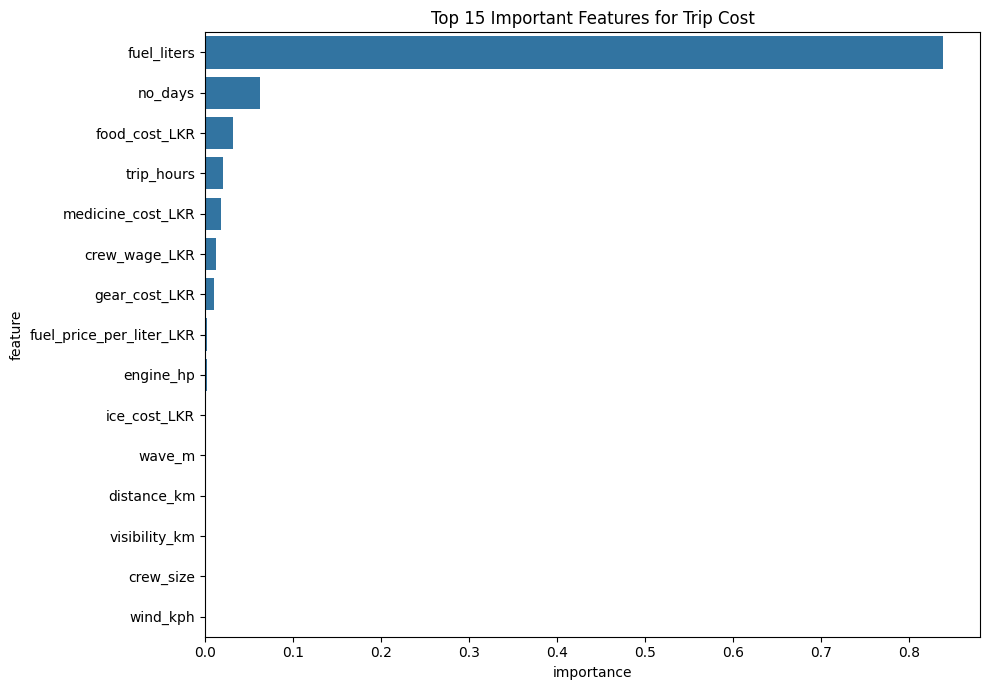

In [3]:
# ============================================================
# 0. IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# 1. LOAD DATA (Kaggle + Synthetic) FROM GOOGLE DRIVE
# ============================================================
drive_path = "/content/drive/MyDrive/research/Sri_Lanka_Fishing/"

train_files = [
    "train_sri_lanka_fishing_trips_train_2022.csv",
    "train_sri_lanka_fishing_trips_train_2023.csv",
    "train_sri_lanka_fishing_trips_train_2024.csv",
    "train_sri_lanka_fishing_trips_train_2025.csv",
]

test_files = [
    "test_sri_lanka_fishing_trips_test_2022.csv",
    "test_sri_lanka_fishing_trips_test_2023.csv",
    "test_sri_lanka_fishing_trips_test_2024.csv",
    "test_sri_lanka_fishing_trips_test_2025.csv",
]

# Load + merge all years
train_df = pd.concat([pd.read_csv(drive_path + f) for f in train_files], ignore_index=True)
test_df = pd.concat([pd.read_csv(drive_path + f) for f in test_files], ignore_index=True)

# Combine into one master dataset for ML
df = pd.concat([train_df, test_df], ignore_index=True)
print("Full dataset shape:", df.shape)

# ============================================================
# 2. BASIC CLEANING
# ============================================================
# Remove duplicates
df = df.drop_duplicates()

# Drop rows with no target
df = df.dropna(subset=["total_cost_LKR"])

# Replace inf/nan
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Convert categorical to category
categorical_cols = ["vessel_choice", "trip_type", "safety", "boat_type_or_class"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

print("Cleaned dataset shape:", df.shape)

# ============================================================
# 3. FEATURE SELECTION
# ============================================================
target = "total_cost_LKR"

numeric_features = [
    'distance_km','trip_hours','no_days','engine_hp','crew_size','month',
    'wind_kph','wave_m','precip_mm','visibility_km','fuel_liters',
    'fuel_price_per_liter_LKR','ice_cost_LKR','food_cost_LKR',
    'medicine_cost_LKR','gear_cost_LKR','crew_wage_LKR',
]

categorical_features = ["vessel_choice", "boat_type_or_class", "trip_type", "safety"]

X = df[numeric_features + categorical_features]
y = df[target]

# One-hot encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

print("Final feature matrix:", X.shape)

# ============================================================
# 4. TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scaling numeric features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# ============================================================
# 5. MODEL TRAINING — RANDOM FOREST
# ============================================================
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=18,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# ============================================================
# 6. MODEL EVALUATION
# ============================================================
preds = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("========== MODEL PERFORMANCE ==========")
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))

# ============================================================
# 7. FEATURE IMPORTANCE PLOT
# ============================================================
importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(data=importance.head(15), x="importance", y="feature")
plt.title("Top 15 Important Features for Trip Cost")
plt.tight_layout()
plt.show()


In [6]:
# ============================================================
# 1. LOAD DATA (Kaggle + Synthetic) FROM GOOGLE DRIVE
# ============================================================
drive_path = "/content/drive/MyDrive/research/Sri_Lanka_Fishing/"

train_files = [
    "train_sri_lanka_fishing_trips_train_2022.csv",
    "train_sri_lanka_fishing_trips_train_2023.csv",
    "train_sri_lanka_fishing_trips_train_2024.csv",
    "train_sri_lanka_fishing_trips_train_2025.csv",
]

test_files = [
    "test_sri_lanka_fishing_trips_test_2022.csv",
    "test_sri_lanka_fishing_trips_test_2023.csv",
    "test_sri_lanka_fishing_trips_test_2024.csv",
    "test_sri_lanka_fishing_trips_test_2025.csv",
]

# LOAD each file safely + show missing ones
def safe_load(file):
    path = drive_path + file
    try:
        return pd.read_csv(path)
    except FileNotFoundError:
        print("❌ FILE NOT FOUND:", path)
        return None

train_df_list = [safe_load(f) for f in train_files]
test_df_list  = [safe_load(f) for f in test_files]

# Remove None files
train_df_list = [df for df in train_df_list if df is not None]
test_df_list  = [df for df in test_df_list if df is not None]

train_df = pd.concat(train_df_list, ignore_index=True)
test_df  = pd.concat(test_df_list, ignore_index=True)

df = pd.concat([train_df, test_df], ignore_index=True)
print("Full dataset shape:", df.shape)


Full dataset shape: (20000, 39)


In [7]:
# ============================================================
# WEATHER FEATURE IMPORTANCE
# ============================================================
weather_cols = ["wind_kph", "wave_m", "precip_mm", "visibility_km"]

weather_importance = importance[importance["feature"].isin(weather_cols)]

print("\n===== WEATHER FEATURE IMPORTANCE =====")
print(weather_importance)



===== WEATHER FEATURE IMPORTANCE =====
         feature  importance
7         wave_m    0.000179
9  visibility_km    0.000159
6       wind_kph    0.000100
8      precip_mm    0.000097


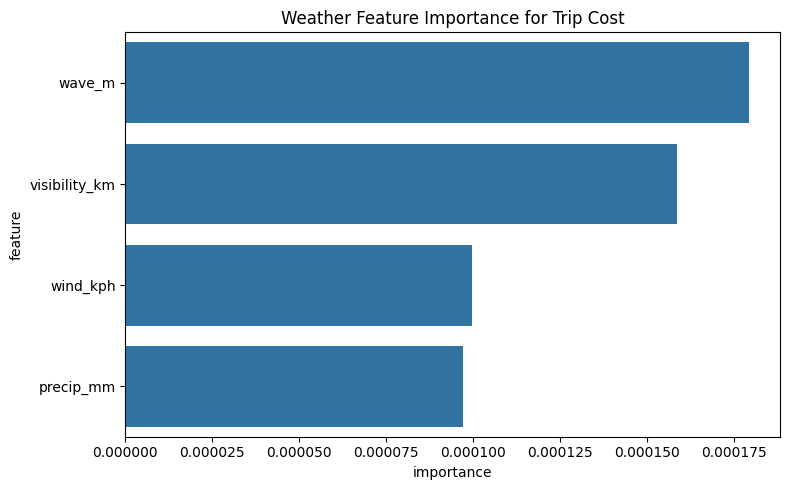

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(data=weather_importance, x="importance", y="feature")
plt.title("Weather Feature Importance for Trip Cost")
plt.tight_layout()
plt.show()
